In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("kc_house_data.csv")

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

In [7]:
df['is_renovated'] = df["yr_renovated"].apply(lambda x: True if x != 0 else False)

<ipython-input-7-2611b96d7793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_renovated'] = df["yr_renovated"].apply(lambda x: True if x != 0 else False)


In [8]:
df = df.drop("yr_renovated", axis=1)

In [9]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,True
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530,0,2009,False
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310,0,2014,False
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020,0,2009,False
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600,0,2004,False


In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [12]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]
categorical_columns = x.columns[(x.dtypes == "object")]

In [13]:
col_transf = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough"
)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [15]:
models = []
models.append(("RF", RandomForestRegressor()))
models.append(("DT", DecisionTreeRegressor()))

In [16]:
pipelines = {name: make_pipeline(col_transf, model) for name, model in models}

In [17]:
results = []
scoring = 'r2'
kfolds = 5

for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring=scoring)
	results.append({name: cv_results})

In [19]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

In [20]:
req = X_test.iloc[0:1]
req

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
6638,4,2.25,2410,4250,1.5,0,0,7,1460,950,1929,False


In [21]:
y_test.iloc[0]

735000.0

In [22]:
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [23]:
best_pipeline.predict(req)

array([687281.])

In [24]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


In [25]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [26]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
6638,4,2.25,2410,4250,1.5,0,0,7,1460,950,1929,False
7366,3,1.50,2170,16600,1.0,1,2,10,1130,1040,1979,False
3158,2,1.00,1450,6380,1.0,0,0,7,1450,0,1967,False
9117,5,3.25,4500,9648,2.0,0,4,8,3000,1500,1968,False
3392,2,1.00,860,6000,1.0,0,0,6,860,0,1945,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8494,4,1.75,1530,8152,1.0,0,0,6,910,620,1948,False
5359,3,1.75,1580,9187,1.0,0,0,8,1180,400,1993,False
5242,4,2.50,2650,9451,2.0,0,0,8,2650,0,1993,False
13777,2,1.00,820,6250,1.0,0,0,5,820,0,1922,False


In [27]:
best_pipeline[0].transform(X_test)

array([[ 0.68095813,  0.17910983,  0.36930244, ...,  1.49451902,
        -1.42634559,  0.        ],
       [-0.39309461, -0.79708298,  0.10603206, ...,  1.6984331 ,
         0.27455414,  0.        ],
       [-1.46714735, -1.44787818, -0.68377908, ..., -0.65790732,
        -0.1336618 ,  0.        ],
       ...,
       [ 0.68095813,  0.50450743,  0.63257282, ..., -0.65790732,
         0.75080606,  0.        ],
       [-1.46714735, -1.44787818, -1.37486383, ..., -0.65790732,
        -1.66447155,  0.        ],
       [ 0.68095813,  0.82990504, -0.28887351, ..., -0.65790732,
        -0.30375177,  0.        ]])

In [28]:
pd.DataFrame(best_pipeline[0].transform(X_test), columns=x.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
0,0.680958,0.179110,0.369302,-0.270870,0.010939,-0.086701,-0.305117,-0.555321,-0.392339,1.494519,-1.426346,0.0
1,-0.393095,-0.797083,0.106032,0.042983,-0.916171,11.533907,2.320148,2.002805,-0.793225,1.698433,0.274554,0.0
2,-1.467147,-1.447878,-0.683779,-0.216740,-0.916171,-0.086701,-0.305117,-0.555321,-0.404487,-0.657907,-0.133662,0.0
3,1.755011,1.480700,2.661949,-0.133690,0.938048,-0.086701,4.945414,0.297388,1.478461,2.740661,-0.099644,0.0
4,-1.467147,-1.447878,-1.330985,-0.226397,-0.916171,-0.086701,-0.305117,-1.408030,-1.121222,-0.657907,-0.882058,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4318,0.680958,-0.471685,-0.596022,-0.171708,-0.916171,-0.086701,-0.305117,-1.408030,-1.060482,0.746834,-0.780004,0.0
4319,-0.393095,-0.471685,-0.541174,-0.145405,-0.916171,-0.086701,-0.305117,0.297388,-0.732485,0.248377,0.750806,0.0
4320,0.680958,0.504507,0.632573,-0.138696,0.938048,-0.086701,-0.305117,0.297388,1.053279,-0.657907,0.750806,0.0
4321,-1.467147,-1.447878,-1.374864,-0.220044,-0.916171,-0.086701,-0.305117,-2.260739,-1.169815,-0.657907,-1.664472,0.0


In [29]:
df_explainer = pd.DataFrame(best_pipeline[0].transform(X_test), columns=x.columns).sample(100)
df_explainer

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
3526,-0.393095,-0.471685,-0.771536,-0.330058,2.792268,-0.086701,-0.305117,0.297388,-0.501672,-0.657907,1.227058,0.0
3060,-0.393095,0.829905,0.007306,-0.134910,-0.916171,-0.086701,-0.305117,-0.555321,0.360840,-0.657907,0.580716,0.0
1353,1.755011,0.829905,0.698390,-0.264517,0.938048,-0.086701,-0.305117,0.297388,1.126168,-0.657907,1.465184,0.0
7,0.680958,0.179110,0.336394,0.510790,-0.916171,-0.086701,-0.305117,0.297388,0.725282,-0.657907,0.206518,0.0
718,-1.467147,-0.146288,-0.892201,-0.119662,-0.916171,-0.086701,-0.305117,-0.555321,-0.926853,-0.114136,0.410626,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2902,0.680958,0.504507,0.171850,-0.267770,0.938048,-0.086701,-0.305117,0.297388,-0.295155,0.905434,-1.222238,0.0
1999,0.680958,-0.797083,1.008830,0.114140,0.938048,-0.086701,-0.305117,-0.555321,0.546706,1.064034,-1.698490,0.0
3885,-0.393095,0.504507,0.511907,-0.257910,0.938048,-0.086701,-0.305117,0.297388,0.919651,-0.657907,1.329112,0.0
336,0.680958,-0.471685,0.073123,-0.175571,-0.916171,-0.086701,-0.305117,0.297388,-0.453079,0.996062,-0.201698,0.0


In [30]:
explainer = shap.Explainer(best_pipeline[1].predict, df_explainer)

In [31]:
import numpy as np

In [32]:
transformed_val = np.array([best_pipeline[0].transform(X_test)[0]])
transformed_val

array([[ 0.68095813,  0.17910983,  0.36930244, -0.27087038,  0.01093871,
        -0.08670089, -0.30511686, -0.55532102, -0.39233908,  1.49451902,
        -1.42634559,  0.        ]])

In [33]:
best_pipeline[1].predict(transformed_val)

array([687281.])

In [34]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
6638,4,2.25,2410,4250,1.5,0,0,7,1460,950,1929,False
7366,3,1.50,2170,16600,1.0,1,2,10,1130,1040,1979,False
3158,2,1.00,1450,6380,1.0,0,0,7,1450,0,1967,False
9117,5,3.25,4500,9648,2.0,0,4,8,3000,1500,1968,False
3392,2,1.00,860,6000,1.0,0,0,6,860,0,1945,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8494,4,1.75,1530,8152,1.0,0,0,6,910,620,1948,False
5359,3,1.75,1580,9187,1.0,0,0,8,1180,400,1993,False
5242,4,2.50,2650,9451,2.0,0,0,8,2650,0,1993,False
13777,2,1.00,820,6250,1.0,0,0,5,820,0,1922,False


In [35]:
X_test[X_test.index.isin([1518])]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated


In [36]:
df_explainer

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
3526,-0.393095,-0.471685,-0.771536,-0.330058,2.792268,-0.086701,-0.305117,0.297388,-0.501672,-0.657907,1.227058,0.0
3060,-0.393095,0.829905,0.007306,-0.134910,-0.916171,-0.086701,-0.305117,-0.555321,0.360840,-0.657907,0.580716,0.0
1353,1.755011,0.829905,0.698390,-0.264517,0.938048,-0.086701,-0.305117,0.297388,1.126168,-0.657907,1.465184,0.0
7,0.680958,0.179110,0.336394,0.510790,-0.916171,-0.086701,-0.305117,0.297388,0.725282,-0.657907,0.206518,0.0
718,-1.467147,-0.146288,-0.892201,-0.119662,-0.916171,-0.086701,-0.305117,-0.555321,-0.926853,-0.114136,0.410626,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2902,0.680958,0.504507,0.171850,-0.267770,0.938048,-0.086701,-0.305117,0.297388,-0.295155,0.905434,-1.222238,0.0
1999,0.680958,-0.797083,1.008830,0.114140,0.938048,-0.086701,-0.305117,-0.555321,0.546706,1.064034,-1.698490,0.0
3885,-0.393095,0.504507,0.511907,-0.257910,0.938048,-0.086701,-0.305117,0.297388,0.919651,-0.657907,1.329112,0.0
336,0.680958,-0.471685,0.073123,-0.175571,-0.916171,-0.086701,-0.305117,0.297388,-0.453079,0.996062,-0.201698,0.0


In [ ]:
shap_values = explainer(df_explainer)

X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestRegressor was fitted without feature names
X has feature names, but RandomForestReg

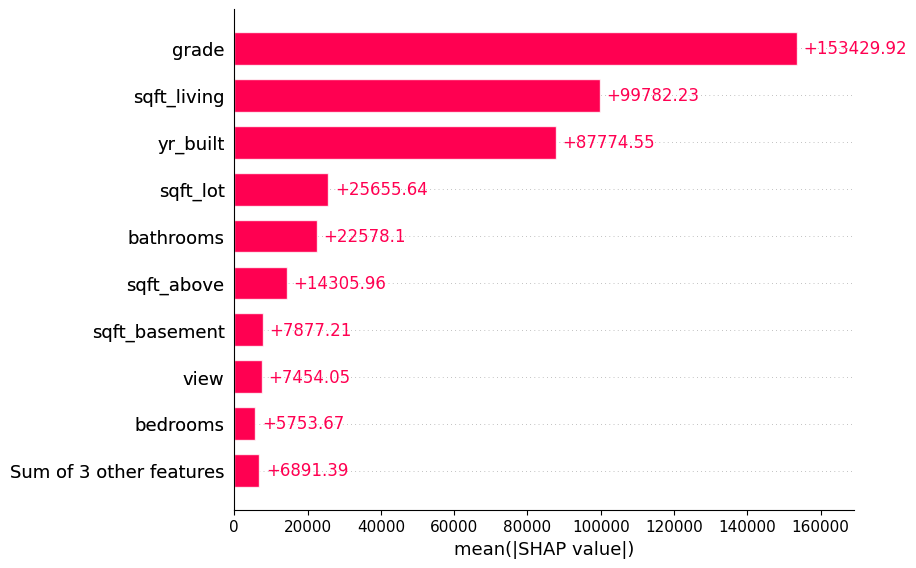

In [ ]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


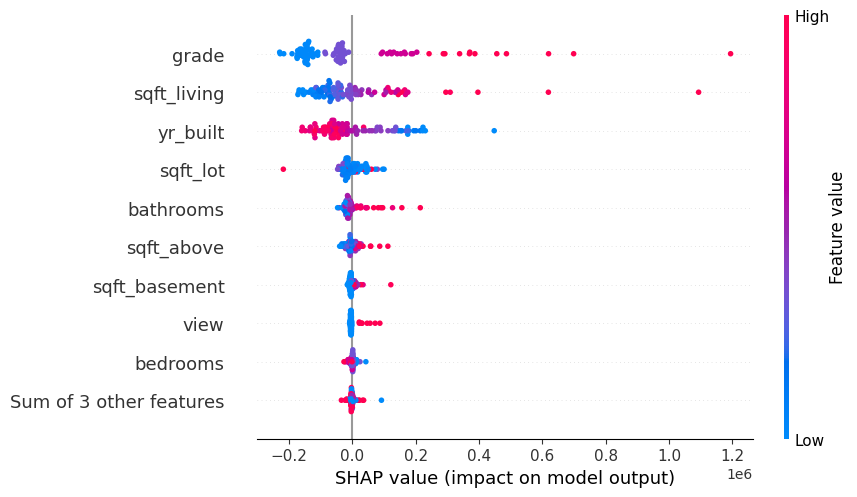

In [ ]:
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


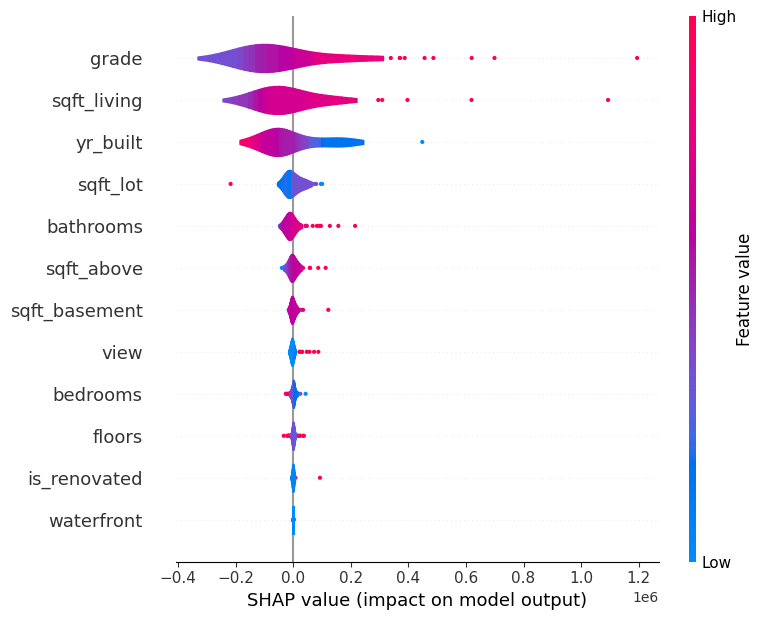

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

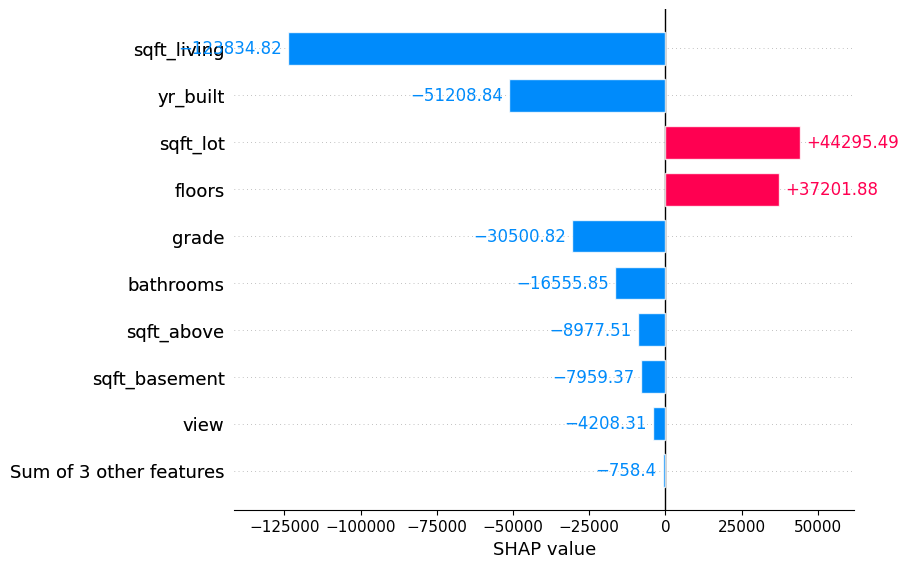

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
X_test.iloc[1518]

In [ ]:
shap.plots.waterfall(shap_values[0])